In [56]:
import os
import shutil
import numpy as np
import pandas as pd
from scipy import signal
import utils.read_intan as ri
import utils.plot_chuncked_data as pltdata
from pathlib import Path

In [57]:
resample_frequency = 2000
lowpass_freq = 100
butteryworth_order = 4
epoch_length = 4
channel_pin = {
    "Fp1":19,
    "Fp2":11,
    "F3":18,
    "Fz":20,
    "F4":10,
    "C1":17,
    "C2":9,
    "P3":16,
    "Pz":12,
    "P4":8,
    "T5":15,
    "T1":14,
    "T2":22,
    "T6":23,
    "O1":13,
    "O2":21
}

In [58]:
# Parameters
n = 547
file_path = "/Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/250827 overnight EEG A_WT+pilo B_KO+pilo_250827_175814"
target_dir = "/Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/epilepsy_data/250827 overnight EEG A_WT+pilo B_KO+pilo"  # Change this to your desired target directory

# Get all files from file_path, sorted by name
all_files = sorted([f for f in os.listdir(file_path) if os.path.isfile(os.path.join(file_path, f))])

print(f"Total files found: {len(all_files)}")
print(f"Looking for file at index {n} (the {n}th file)")

# Get the 546th file and the next 9 files (10 files total)
if n <= len(all_files):
    files_to_copy = all_files[n-1:n+9]  # n-1 because indexing starts at 0
    print(f"\nFiles to copy (positions {n} to {n+9}):")
    for i, f in enumerate(files_to_copy, start=n):
        print(f"  {i}: {f}")
    
    # Create target directory if it doesn't exist
    os.makedirs(target_dir, exist_ok=True)
    
    # Copy the 10 files
    for file_name in files_to_copy:
        src = os.path.join(file_path, file_name)
        dst = os.path.join(target_dir, file_name)
        shutil.copy2(src, dst)
        print(f"Copied: {file_name}")
    
    print(f"\nSuccessfully copied 10 files to {target_dir}")
else:
    print(f"Error: Only {len(all_files)} files found, but you requested file #{n}")

Total files found: 677
Looking for file at index 547 (the 547th file)

Files to copy (positions 547 to 556):
  547: 250827 overnight EEG A_WT+pilo B_KO+pilo_250828_030413.rhd
  548: 250827 overnight EEG A_WT+pilo B_KO+pilo_250828_030513.rhd
  549: 250827 overnight EEG A_WT+pilo B_KO+pilo_250828_030613.rhd
  550: 250827 overnight EEG A_WT+pilo B_KO+pilo_250828_030713.rhd
  551: 250827 overnight EEG A_WT+pilo B_KO+pilo_250828_030813.rhd
  552: 250827 overnight EEG A_WT+pilo B_KO+pilo_250828_030913.rhd
  553: 250827 overnight EEG A_WT+pilo B_KO+pilo_250828_031013.rhd
  554: 250827 overnight EEG A_WT+pilo B_KO+pilo_250828_031113.rhd
  555: 250827 overnight EEG A_WT+pilo B_KO+pilo_250828_031213.rhd
  556: 250827 overnight EEG A_WT+pilo B_KO+pilo_250828_031313.rhd
Copied: 250827 overnight EEG A_WT+pilo B_KO+pilo_250828_030413.rhd
Copied: 250827 overnight EEG A_WT+pilo B_KO+pilo_250828_030413.rhd
Copied: 250827 overnight EEG A_WT+pilo B_KO+pilo_250828_030513.rhd
Copied: 250827 overnight EEG A

In [59]:
epi_list = ["/Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/epilepsy_data/250827 overnight EEG A_WT+pilo B_KO+pilo"]
file_path = epi_list[0]
df, _ = ri.rhd_folder_to_dataframe(file_path)


Found 10 RHD files in /Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/epilepsy_data/250827 overnight EEG A_WT+pilo B_KO+pilo
Successfully loaded data from 250827 overnight EEG A_WT+pilo B_KO+pilo_250828_030413.rhd
Successfully loaded data from 250827 overnight EEG A_WT+pilo B_KO+pilo_250828_030413.rhd
Successfully loaded data from 250827 overnight EEG A_WT+pilo B_KO+pilo_250828_030513.rhd
Successfully loaded data from 250827 overnight EEG A_WT+pilo B_KO+pilo_250828_030513.rhd
Successfully loaded data from 250827 overnight EEG A_WT+pilo B_KO+pilo_250828_030613.rhd
Successfully loaded data from 250827 overnight EEG A_WT+pilo B_KO+pilo_250828_030613.rhd
Successfully loaded data from 250827 overnight EEG A_WT+pilo B_KO+pilo_250828_030713.rhd
Successfully loaded data from 250827 overnight EEG A_WT+pilo B_KO+pilo_250828_030713.rhd
Successfully loaded data from 250827 overnight EEG A_WT+pilo B_KO+pilo_250828_030813.rhd
Successfully loaded data from 250827 overnight EEG A_WT+pilo B_KO+pil

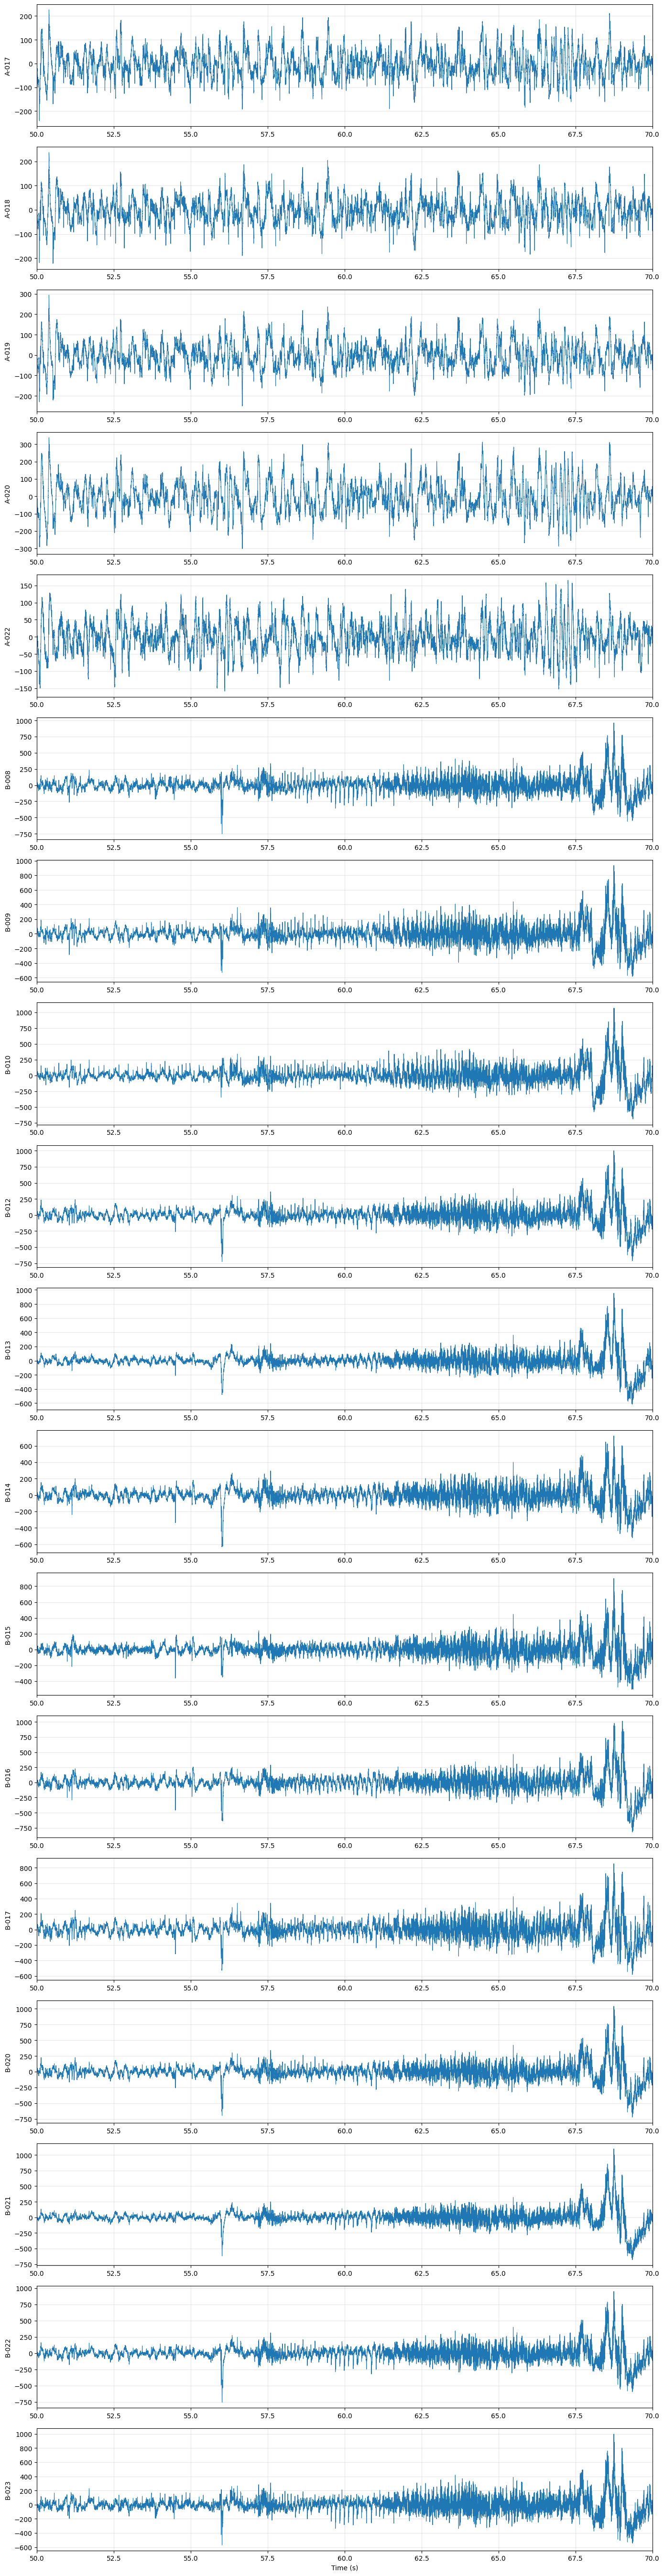

Plotted 18 channels from 50s to 70s


In [60]:
import matplotlib.pyplot as plt

# Parameters for plotting
start_time = 50  # Starting time in seconds (change as needed)
duration = 20  # Duration in seconds (change as needed)

# Get the time array
time_array = np.array(df['time'].values)

# Find indices for the time window
start_idx = np.searchsorted(time_array, start_time)
end_idx = np.searchsorted(time_array, start_time + duration)

# Extract data columns (exclude 'time' column)
data_columns = [col for col in df.columns if col != 'time']

# Create figure with subplots (one per channel)
n_channels = len(data_columns)
fig, axes = plt.subplots(n_channels, 1, figsize=(14, 3 * n_channels))

# Handle case where there's only one channel
if n_channels == 1:
    axes = [axes]

# Plot each channel separately
for idx, col in enumerate(data_columns):
    data = np.array(df[col].values)
    time_window = time_array[start_idx:end_idx]
    data_window = data[start_idx:end_idx]
    
    axes[idx].plot(time_window, data_window, linewidth=0.8)
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_xlim(start_time, start_time + duration)

axes[-1].set_xlabel('Time (s)', fontsize=10)
plt.tight_layout()
plt.show()

print(f"Plotted {n_channels} channels from {start_time}s to {start_time + duration}s")

In [61]:
# Filter columns that contain 'B'
b_columns = [col for col in df.columns if 'B' in col and col != 'time']
print(f"B columns found: {b_columns}")

# Create reverse mapping from channel_pin values to electrode labels
reverse_channel_map = {v: k for k, v in channel_pin.items()}
print(f"Reverse channel map: {reverse_channel_map}")

# Create a new dataframe with time and mapped B channels
df_processed = pd.DataFrame()
df_processed['time'] = df['time'].values

# Map B channels to electrode labels based on pin number
for col in b_columns:
    # Extract pin number (e.g., "B-009" → 9)
    try:
        pin_num = int(col.split('-')[-1])  # handles B-009 → 9, B-021 → 21
    except ValueError:
        print(f"Warning: could not parse pin number from {col}")
        continue

    # Get electrode label from reverse_channel_map
    if pin_num in reverse_channel_map:
        electrode_label = reverse_channel_map[pin_num]
        df_processed[electrode_label] = df[col].values
        print(f"Mapped {col} -> {electrode_label} (pin {pin_num})")
    else:
        print(f"Warning: pin {pin_num} not found in channel_pin")

print(f"\nProcessed dataframe shape before resampling: {df_processed.shape}")
print(f"Columns: {df_processed.columns.tolist()}")

# --- Resampling part ---
time_values = df['time'].values
sampling_rate_current = 1 / np.mean(np.diff(time_values))
target_rate = 2000  # Hz
current_n_samples = len(df_processed)
target_n_samples = int(current_n_samples * target_rate / sampling_rate_current)

print(f"\nCurrent sampling rate: {sampling_rate_current:.2f}Hz")
print(f"Resampling from {sampling_rate_current:.2f}Hz to {target_rate}Hz")
print(f"Current samples: {current_n_samples}, Target samples: {target_n_samples}")


# Convert to numpy array (excluding time column)
data = df_processed.iloc[:, 1:].values  # shape: (N, num_channels)
# Resample all channels together
data_resampled = signal.resample(data, target_n_samples, axis=0)
# Rebuild DataFrame
df_resampled = pd.DataFrame(
    data_resampled,
    columns=df_processed.columns[1:]
)
# Recompute time axis linearly if you want uniform spacing
t_start, t_end = df_processed['time'].iloc[0], df_processed['time'].iloc[-1]
df_resampled['time'] = np.linspace(t_start, t_end, target_n_samples)
# Optional: reorder columns
df_resampled = df_resampled[['time'] + list(df_processed.columns[1:])]

# --- Lowpass filter ---
cutoff_freq = 80  # Hz
nyquist_freq = target_rate / 2
normalized_cutoff = cutoff_freq / nyquist_freq
b, a = signal.butter(4, normalized_cutoff, btype='low')

print(f"\nApplying lowpass filter (cutoff: {cutoff_freq}Hz, order: 4)")
for col in df_resampled.columns[1:]:
    df_resampled[col] = signal.filtfilt(b, a, df_resampled[col].values)
    print(f"Filtered {col}")

# --- Save ---
output_path = "./data/processed_b_channels_2000hz_80hz_filtered.csv"
df_resampled.to_csv(output_path, index=False)

print(f"\nSuccessfully saved processed data to: {output_path}")
print(f"Output dataframe shape: {df_resampled.shape}")
print(f"Output columns: {df_resampled.columns.tolist()}")

# --- Verify ---
df_check = pd.read_csv(output_path)
print(f"\nVerification - Read back from CSV:")
print(f"Shape: {df_check.shape}")
print(f"Columns: {df_check.columns.tolist()}")
print(f"First few rows:\n{df_check.head()}")


B columns found: ['B-008', 'B-009', 'B-010', 'B-012', 'B-013', 'B-014', 'B-015', 'B-016', 'B-017', 'B-020', 'B-021', 'B-022', 'B-023']
Reverse channel map: {19: 'Fp1', 11: 'Fp2', 18: 'F3', 20: 'Fz', 10: 'F4', 17: 'C1', 9: 'C2', 16: 'P3', 12: 'Pz', 8: 'P4', 15: 'T5', 14: 'T1', 22: 'T2', 23: 'T6', 13: 'O1', 21: 'O2'}
Mapped B-008 -> P4 (pin 8)
Mapped B-009 -> C2 (pin 9)
Mapped B-010 -> F4 (pin 10)
Mapped B-012 -> Pz (pin 12)
Mapped B-013 -> O1 (pin 13)
Mapped B-014 -> T1 (pin 14)
Mapped B-015 -> T5 (pin 15)
Mapped B-016 -> P3 (pin 16)
Mapped B-017 -> C1 (pin 17)
Mapped B-020 -> Fz (pin 20)
Mapped B-021 -> O2 (pin 21)
Mapped B-022 -> T2 (pin 22)
Mapped B-023 -> T6 (pin 23)

Processed dataframe shape before resampling: (12000000, 14)
Columns: ['time', 'P4', 'C2', 'F4', 'Pz', 'O1', 'T1', 'T5', 'P3', 'C1', 'Fz', 'O2', 'T2', 'T6']

Current sampling rate: 20000.00Hz
Resampling from 20000.00Hz to 2000Hz
Current samples: 12000000, Target samples: 1200000

Current sampling rate: 20000.00Hz
Resamp

In [51]:
arr = np.array(df['time'].values)
result = np.diff(arr)
print(1/np.mean(result), np.std(result))

20000.0 2.174855977585594e-14


In [52]:
data1 = np.array(df['A-017'].values)
data2 = np.array(df['B-017'].values)
np.save("./data/SNU_EPI/250904_ON_WTP_19_256Hz.npy", data1)
np.save("./data/SNU_EPI/250904_ON_KO_19_256Hz.npy", data2)

Columns containing 'B': ['B-008', 'B-009', 'B-010', 'B-012', 'B-013', 'B-014', 'B-015', 'B-016', 'B-017', 'B-020', 'B-021', 'B-022', 'B-023']
Number of channels: 13


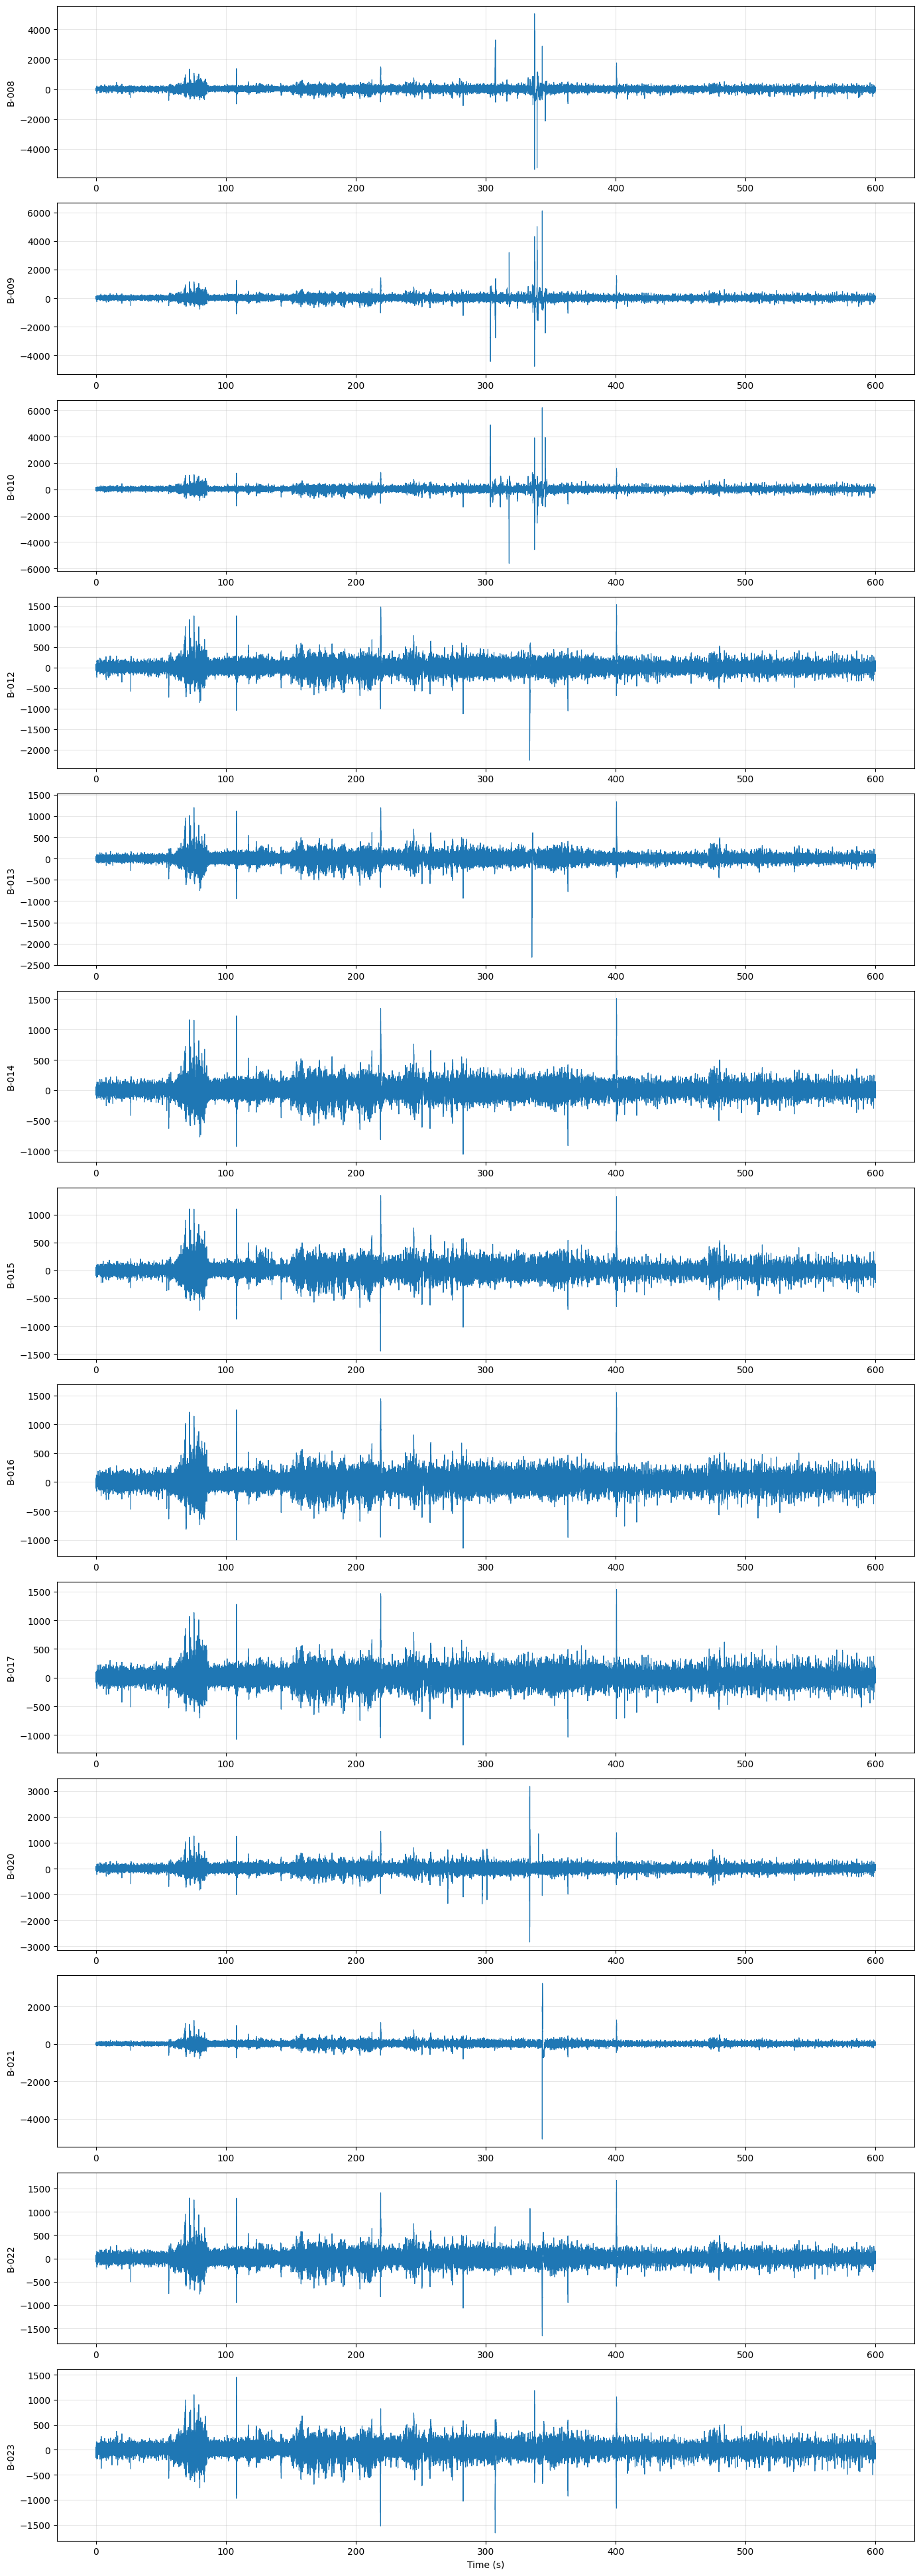


Plotted 13 channels containing 'B'


In [53]:
# Filter columns that contain the letter 'B'
b_columns = [col for col in df.columns if 'B' in col and col != 'time']

print(f"Columns containing 'B': {b_columns}")
print(f"Number of channels: {len(b_columns)}")

# Get the time array
time_array = np.array(df['time'].values)

# Create figure with subplots (one per B channel)
n_channels = len(b_columns)
if n_channels > 0:
    fig, axes = plt.subplots(n_channels, 1, figsize=(14, 3 * n_channels))
    
    # Handle case where there's only one channel
    if n_channels == 1:
        axes = [axes]
    
    # Plot each B channel separately
    for idx, col in enumerate(b_columns):
        data = np.array(df[col].values)
        
        axes[idx].plot(time_array, data, linewidth=0.8)
        axes[idx].set_ylabel(col, fontsize=10)
        axes[idx].grid(True, alpha=0.3)
    
    axes[-1].set_xlabel('Time (s)', fontsize=10)
    plt.tight_layout()
    plt.show()
    
    print(f"\nPlotted {n_channels} channels containing 'B'")
else:
    print("No columns containing 'B' found in the dataframe")

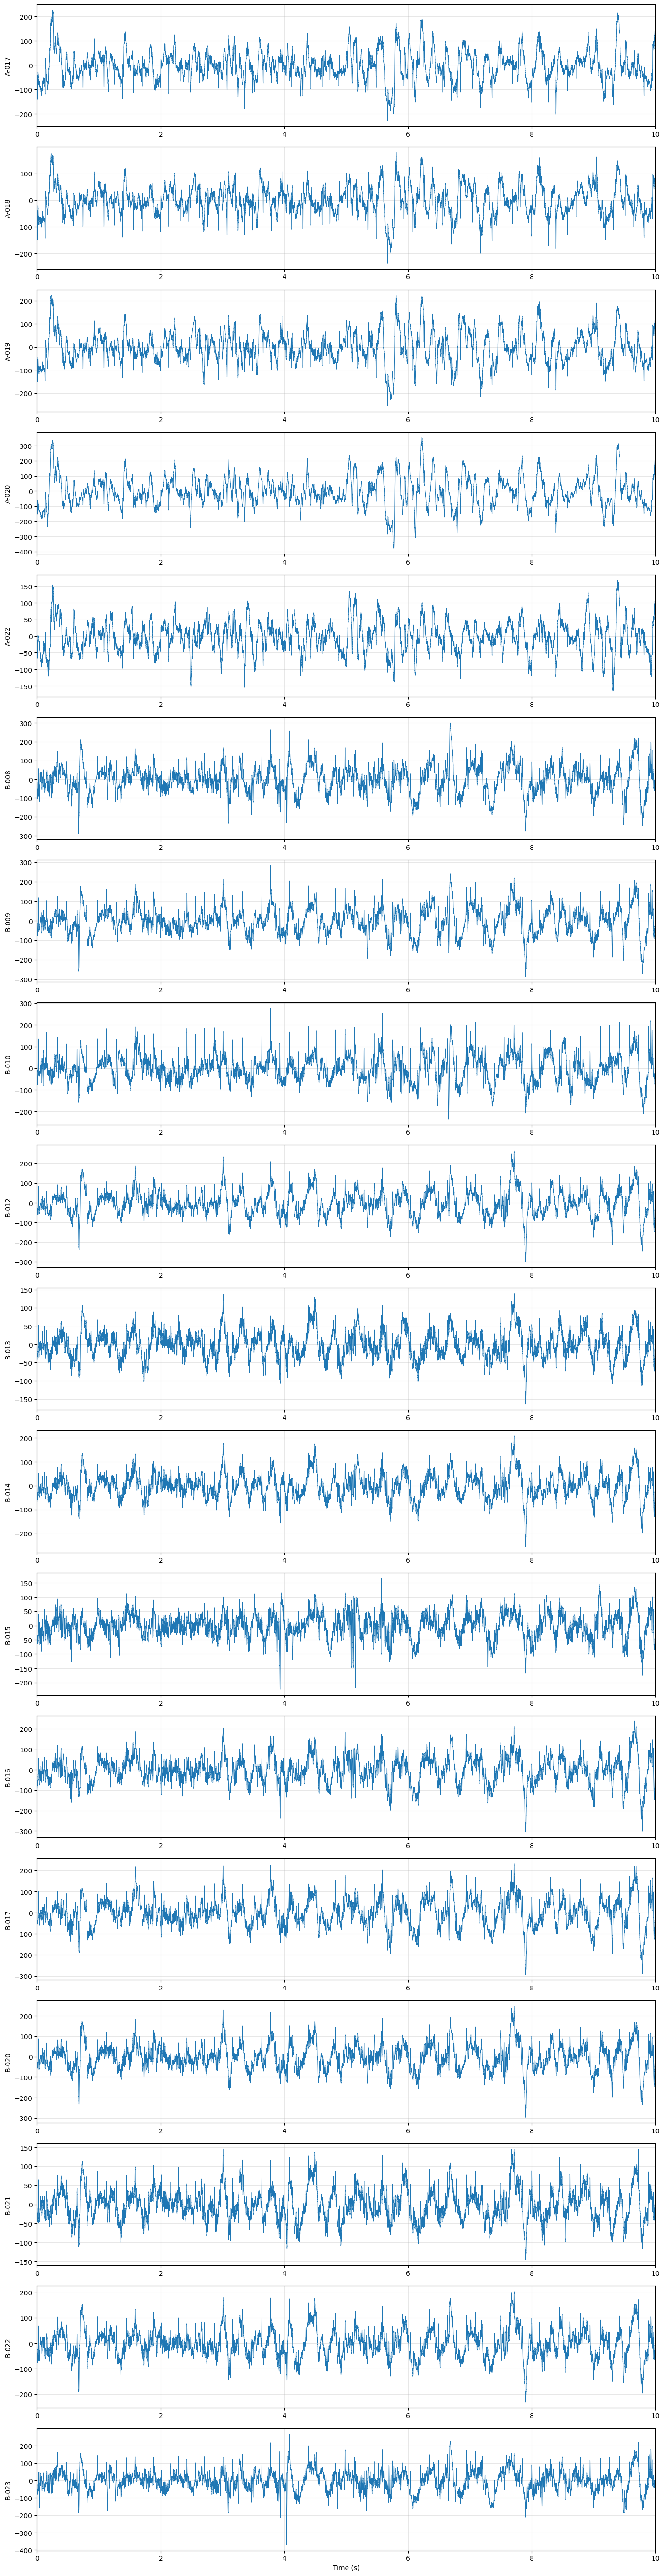

Plotted 18 channels from 0s to 10s


In [54]:
import matplotlib.pyplot as plt

# Parameters for plotting
start_time = 0  # Starting time in seconds (change as needed)
duration = 10  # Duration in seconds (change as needed)

# Get the time array
time_array = np.array(df['time'].values)

# Find indices for the time window
start_idx = np.searchsorted(time_array, start_time)
end_idx = np.searchsorted(time_array, start_time + duration)

# Extract data columns (exclude 'time' column)
data_columns = [col for col in df.columns if col != 'time']

# Create figure with subplots (one per channel)
n_channels = len(data_columns)
fig, axes = plt.subplots(n_channels, 1, figsize=(14, 3 * n_channels))

# Handle case where there's only one channel
if n_channels == 1:
    axes = [axes]

# Plot each channel separately
for idx, col in enumerate(data_columns):
    data = np.array(df[col].values)
    time_window = time_array[start_idx:end_idx]
    data_window = data[start_idx:end_idx]
    
    axes[idx].plot(time_window, data_window, linewidth=0.8)
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_xlim(start_time, start_time + duration)

axes[-1].set_xlabel('Time (s)', fontsize=10)
plt.tight_layout()
plt.show()

print(f"Plotted {n_channels} channels from {start_time}s to {start_time + duration}s")